In [580]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

In [581]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [582]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/주간프로젝트/listings.csv'

In [583]:
df = pd.read_csv(path)
df = pd.DataFrame(df)

In [584]:
dat = df.copy()


<h3>필요한 컬럼 가져오기(24개) + property_type <h3>

In [585]:
#필요한 컬럼 가져오기
selected_columns = ['id','listing_url','host_id', 'property_type',
                    'host_is_superhost','host_total_listings_count','neighbourhood_cleansed','latitude',
                    'longitude','room_type','accommodates','bathrooms','bedrooms','beds','amenities','price',
                    'minimum_nights','maximum_nights','number_of_reviews','number_of_reviews_l30d',
                    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location',
                    'review_scores_value','reviews_per_month']
df = df[selected_columns]

df.head(3)

,id,listing_url,host_id,property_type,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,...,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,1608226,Entire rental unit,t,3.0,Hackney,51.52704,-0.08129,Entire home/apt,...,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,13913,https://www.airbnb.com/rooms/13913,54730,Private room in rental unit,t,5.0,Islington,51.56861,-0.11270,Private room,...,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,15400,https://www.airbnb.com/rooms/15400,60302,Entire rental unit,f,1.0,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,...,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


<h3>필요한 컬럼명 변경<h3>


컬렴명 변경

- 'id' : '숙소 id'
- 'property_type' : '숙소_특징'
- 'listing_url' : '숙소 url'
- 'host_id' : '호스트 id'
- 'host_is_superhost' : '슈퍼호스트 여부'
- 'latitude' : '위도'
- 'longitude' : '경도'
- 'host_total_listings_count' : '등록한 총 숙소 수'
- 'neighbourhood_cleansed' : '클린된 숙소 구'
- 'room_type' : '룸 유형'
- 'accommodates' : '수용 인원수'
- 'bathrooms' : '욕실수'
- 'bedrooms' : '침실수'
- 'beds' : '침대수'
- 'amenities' : '어메니티'
- 'price' : '숙소 가격'
- 'minimum_nights' : '최소 숙박일'
- 'maximum_nights' : '최대 숙박일'
- 'number_of_reviews' : '총 리뷰수'
- 'number_of_reviews_l30d' : '한달치 리뷰수'
- 'review_scores_rating' : '리뷰 총점수'
- 'review_scores_accuracy' : '리뷰점수(숙소정보 정확성 )'
- 'review_scores_cleanliness' : '리뷰점수(청결함)'
- 'review_scores_checkin' : '리뷰점수(체크인과정)'
- 'review_scores_communication' : '리뷰점수(호스트와 소통)'
- 'review_scores_location' : '리뷰점수(숙소위치)'
- 'review_scores_value' : '리뷰점수(숙소가격)'
- 'reviews_per_month' : '월별 평균 리뷰수'

In [586]:
#컬럼명 변경
df = df.rename(columns={
    'id' : '숙소_id',
    'listing_url' : '숙소_url',
    'property_type' : '숙소_특징',
    'host_id' : '호스트_id',
    'host_is_superhost' : '슈퍼호스트',
    'host_total_listings_count' : '숙소_수',
    'neighbourhood_cleansed' : '숙소_지역',
    'latitude' : '위도',
    'longitude' : '경도',
    'room_type' : '숙소_유형',
    'accommodates' : '수용인원수',
    'bathrooms' : '욕실수',
    'bedrooms' : '침실수',
    'beds' : '침대수',
    'amenities' : '어메니티',
    'price' : '숙소_가격',
    'minimum_nights' : '최소_숙박일',
    'maximum_nights' : '최대_숙박일',
    'minimum_maximum_nights' : '적은_최대_숙박일',
    'maximum_maximum_nights' : '많은_최대_숙박일',
    'has_availability' : '숙소_예약가능_여부',
    'number_of_reviews' : '리뷰수',
    'number_of_reviews_l30d' : '30일_리뷰수',
    'review_scores_rating' : '리뷰점수',
    'review_scores_accuracy' : '숙소_정확성_리뷰점수',
    'review_scores_cleanliness' : '숙소_청결도_리뷰점수',
    'review_scores_checkin' : '숙소_체크인_리뷰점수',
    'review_scores_communication' : '숙소_소통_리뷰점수',
    'review_scores_location' : '숙소_위치_리뷰점수',
    'review_scores_value' : '숙소_가격_리뷰점수',
    'reviews_per_month' : '평균_리뷰수'
})

<h3>주제별 컬럼 분류<h3><br>

숙소/숙박 컬럼 (25개) df_lodging - 리뷰 컬럼(10개) df_review

In [587]:
#숙소/숙박관련 컬럼

df_lodging = dat[['id', 'listing_url','host_id','host_is_superhost','property_type',
                  'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
                  'beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,listing_url,host_id,host_is_superhost,property_type,host_total_listings_count,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,Entire rental unit,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,https://www.airbnb.com/rooms/13913,54730,t,Private room in rental unit,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,https://www.airbnb.com/rooms/15400,60302,f,Entire rental unit,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [588]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'property_type' : '숙소_특징',
    'listing_url' : '숙소_url',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)

,숙소_id,숙소_url,호스트_id,슈퍼호스트,숙소_특징,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,Entire rental unit,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,https://www.airbnb.com/rooms/13913,54730,t,Private room in rental unit,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,https://www.airbnb.com/rooms/15400,60302,f,Entire rental unit,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [589]:
#리뷰관련데이터
df_review = dat[['listing_url','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_review.head(3)

,listing_url,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,https://www.airbnb.com/rooms/312761,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,https://www.airbnb.com/rooms/13913,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,https://www.airbnb.com/rooms/15400,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


In [590]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'listing_url' : '숙소_url',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})
df_review.head()

,숙소_url,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,https://www.airbnb.com/rooms/312761,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,https://www.airbnb.com/rooms/13913,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,https://www.airbnb.com/rooms/15400,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54
3,https://www.airbnb.com/rooms/159736,96,0,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62
4,https://www.airbnb.com/rooms/165336,237,2,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57


In [591]:
df_lodging.shape

(90852, 16)

In [592]:
df_review.shape


(90852, 11)

In [593]:
df.shape

(90852, 28)

In [594]:
df.dtypes


숙소_id            int64
숙소_url          object
호스트_id           int64
숙소_특징           object
슈퍼호스트           object
숙소_수           float64
숙소_지역           object
위도             float64
경도             float64
숙소_유형           object
수용인원수            int64
욕실수            float64
침실수            float64
침대수            float64
어메니티            object
숙소_가격           object
최소_숙박일           int64
최대_숙박일           int64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
dtype: object

In [595]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   호스트_id       90852 non-null  int64  
 3   숙소_특징        90852 non-null  object 
 4   슈퍼호스트        90463 non-null  object 
 5   숙소_수         90847 non-null  float64
 6   숙소_지역        90852 non-null  object 
 7   위도           90852 non-null  float64
 8   경도           90852 non-null  float64
 9   숙소_유형        90852 non-null  object 
 10  수용인원수        90852 non-null  int64  
 11  욕실수          57894 non-null  float64
 12  침실수          78118 non-null  float64
 13  침대수          57837 non-null  float64
 14  어메니티         90852 non-null  object 
 15  숙소_가격        57885 non-null  object 
 16  최소_숙박일       90852 non-null  int64  
 17  최대_숙박일       90852 non-null  int64  
 18  리뷰수          90852 non-null  int64  
 19  30일_

<h3>결측치 개수</h3><br>

- 슈퍼호스트 389개
- 문의_응답률 33,055개
- 숙소_수 5개
- 욕실수 32,958개
- 침실수 12,734개
- 침대수 33,015개
- 숙소_가격 32,967개
- 리뷰점수 24,983개
- 숙소_정확성_리뷰점수 25014개
- 숙소_청결도_리뷰점수 25009개
- 숙소_체크인_리뷰점수 25044개
- 숙소_소통_리뷰점수 25019개
- 숙소_위치_리뷰점수 25044개
- 숙소_가격_리뷰점수 25046개
- 평균_리뷰수 24983개

- -----------------------------------------

- 숙소_상세설명 3,001개
- 프로필사진_소지_여부 5개
- 신원_검증_여부 5개
- 숙소_예약가능_여부 4079개

결측치 제거 확정 <br>
- 슈퍼호스트 null값 (389개) 5%이하
- 리뷰수 = 0인 값 --> 리뷰수가 없으면 리뷰점수도 없다
- 숙소수 null값 (5개)
- 리뷰분야 6개 전부 nan값인 컬럼

<h3>슈퍼호스트 결측치 처리</h3>

- 슈퍼호스트가 null값인 데이터 삭제 389개임(5%이하 해당)



In [596]:
df['슈퍼호스트'].isna().sum()


389

In [597]:
df = df.dropna(subset=['슈퍼호스트'])

In [598]:
df.shape

(90463, 28)

<h3>숙소수 결측치 처리</h3>

- 숙소수가 null값인 데이터 삭제 5개임(5%이하 해당)

In [599]:
df = df.dropna(subset=['숙소_수'])


In [600]:
df.shape

(90458, 28)

<h3>리뷰수 결측치 처리</h3>

In [601]:
df[df['리뷰수'] == 0]


,숙소_id,숙소_url,호스트_id,숙소_특징,슈퍼호스트,숙소_수,숙소_지역,위도,경도,숙소_유형,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
9,170524,https://www.airbnb.com/rooms/170524,194769,Entire rental unit,f,9.0,Westminster,51.506120,-0.140290,Entire home/apt,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,318986,https://www.airbnb.com/rooms/318986,1637212,Entire rental unit,f,1.0,Kensington and Chelsea,51.491130,-0.194820,Entire home/apt,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,42692,https://www.airbnb.com/rooms/42692,186510,Private room in rental unit,f,1.0,Hammersmith and Fulham,51.508220,-0.215620,Private room,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,44384,https://www.airbnb.com/rooms/44384,194769,Private room in rental unit,f,9.0,Barnet,51.597900,-0.243270,Private room,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,324055,https://www.airbnb.com/rooms/324055,1664001,Private room in home,f,1.0,Newham,51.553110,0.022730,Private room,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90847,1115272743905612628,https://www.airbnb.com/rooms/1115272743905612628,565833376,Entire rental unit,f,55.0,Bexley,51.502721,0.147342,Entire home/apt,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90848,1115272767893608505,https://www.airbnb.com/rooms/1115272767893608505,565833376,Entire rental unit,f,55.0,Bexley,51.504134,0.148848,Entire home/apt,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90849,1115285644506865913,https://www.airbnb.com/rooms/1115285644506865913,444801189,Room in hotel,f,44.0,Westminster,51.506404,-0.148199,Private room,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90850,1115338006572763275,https://www.airbnb.com/rooms/1115338006572763275,514234035,Entire rental unit,f,62.0,Westminster,51.513649,-0.161906,Entire home/apt,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [602]:
df = df[df['리뷰수'] != 0]


In [603]:
df.shape


(65538, 28)

<h3>리뷰분야 (6개)결측치 처리</h3>
'숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'

In [604]:
review_field = df['숙소_정확성_리뷰점수'].isna() & df['숙소_청결도_리뷰점수'].isna() & df['숙소_체크인_리뷰점수'].isna() & df['숙소_소통_리뷰점수'].isna() \
   & df['숙소_위치_리뷰점수'].isna() &df['숙소_가격_리뷰점수'].isna()

In [605]:
df = df[~review_field]

In [606]:
df.shape

(65516, 28)

In [607]:
#각 분야의 널값
df['숙소_정확성_리뷰점수'].isna().sum() # 9개
df['숙소_청결도_리뷰점수'].isna().sum() # 4개
df['숙소_소통_리뷰점수'].isna().sum() # 14개
df['숙소_위치_리뷰점수'].isna().sum() # 39개
df['숙소_가격_리뷰점수'].isna().sum() # 41개

41

숙소유형이 Hotel room / Shared room 인 행 삭제

- 에어비앤비 숙소의 특징인 개인실 대여, 아파트 집 대여인 점을 이용

In [608]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    42526
Private room       22621
Shared room          220
Hotel room           149
Name: count, dtype: int64

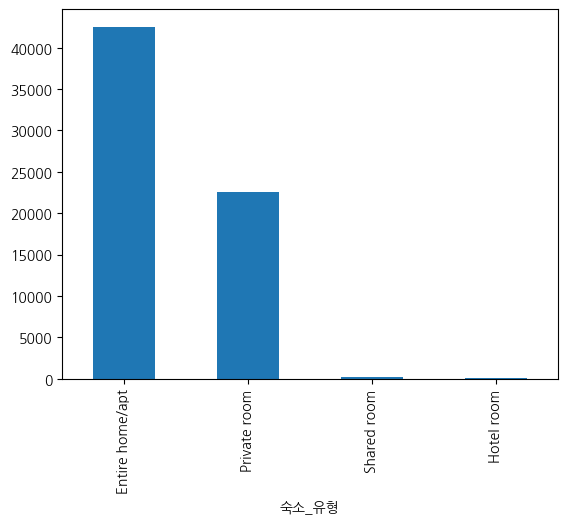

In [609]:
df['숙소_유형'].value_counts().plot(kind='bar')
plt.show()

In [610]:
condition = (df['숙소_유형'] == 'Hotel room') | (df['숙소_유형'] == 'Shared room')

In [611]:
df = df[~condition]

In [612]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    42526
Private room       22621
Name: count, dtype: int64

숙소가격 결측치 처리

숙소가격 데이터타입 float로 번경

In [613]:
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace('$', "")
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace(',', "")
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.strip()

In [614]:
df['숙소_가격'] = df.loc[:,'숙소_가격'].astype(float)
df['숙소_가격']


0        160.0
1         65.0
2        120.0
3         65.0
4        100.0
         ...  
90451     46.0
90568     78.0
90590    136.0
90648    109.0
90735     41.0
Name: 숙소_가격, Length: 65147, dtype: float64

In [615]:
dat = df.copy()

In [649]:
dat.shape

(65147, 28)

숙소_가격 nan값 제거

In [616]:
df.dropna(subset=['숙소_가격'], inplace =  True)

In [617]:
df['숙소_가격']

0        160.0
1         65.0
2        120.0
3         65.0
4        100.0
         ...  
90451     46.0
90568     78.0
90590    136.0
90648    109.0
90735     41.0
Name: 숙소_가격, Length: 43182, dtype: float64

In [618]:
df.shape

(43182, 28)

이상치 처리

In [619]:
London_price = df['숙소_가격']

In [620]:
#이상치값
Q1 = London_price.quantile(0.25)
Q3 = London_price.quantile(0.75)
Median = London_price.median()
IQR = Q3 - Q1

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값
max_value = London_price.max()
min_value = London_price.min()

print('Q1 :',Q1)
print('Q3 :',Q3)
print('IQR :',IQR)
print('lower_bound :', lower_bound)
print('upper_bound :', upper_bound)
print('Median :', Median)
print('max_value :', max_value)
print('min_value :',min_value)

Q1 : 71.0
Q3 : 195.0
IQR : 124.0
lower_bound : -115.0
upper_bound : 381.0
Median : 120.0
max_value : 53588.0
min_value : 0.0


이상치 확인

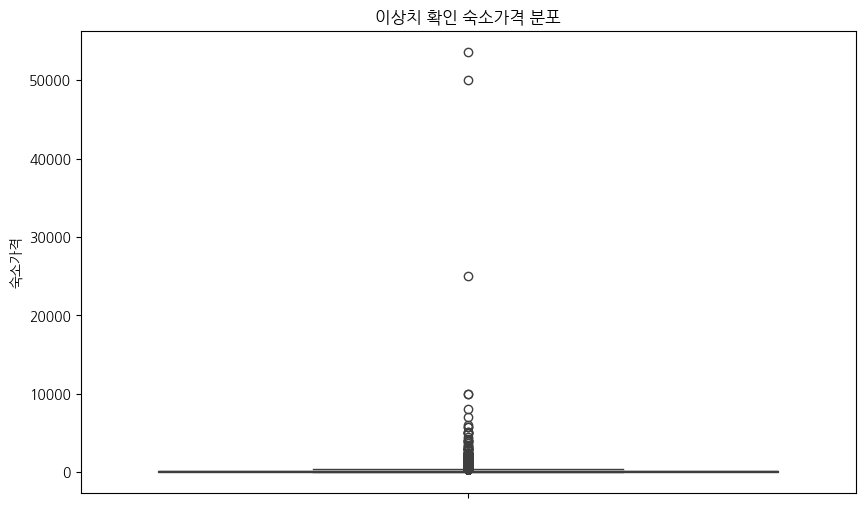

In [621]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='숙소_가격')
plt.title('이상치 확인 숙소가격 분포')
plt.ylabel('숙소가격')
plt.show()

In [622]:
df[df['숙소_가격'] > 381.0].count()

숙소_id          2495
숙소_url         2495
호스트_id         2495
숙소_특징          2495
슈퍼호스트          2495
숙소_수           2495
숙소_지역          2495
위도             2495
경도             2495
숙소_유형          2495
수용인원수          2495
욕실수            2495
침실수            2495
침대수            2495
어메니티           2495
숙소_가격          2495
최소_숙박일         2495
최대_숙박일         2495
리뷰수            2495
30일_리뷰수        2495
리뷰점수           2495
숙소_정확성_리뷰점수    2495
숙소_청결도_리뷰점수    2495
숙소_체크인_리뷰점수    2495
숙소_소통_리뷰점수     2495
숙소_위치_리뷰점수     2495
숙소_가격_리뷰점수     2495
평균_리뷰수         2495
dtype: int64

이상치 제거(2495개) 5%미만

In [623]:
import pandas as pd


# 이상치를 제거하는 함수 정의
def remove_price_outliers(df, price_column):
    Q1 = df[price_column].quantile(0.25)
    Q3 = df[price_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[price_column] >= lower_bound) & (df[price_column] <= upper_bound)]

# 숙소 가격의 이상치 제거
df_clean = remove_price_outliers(df, '숙소_가격')

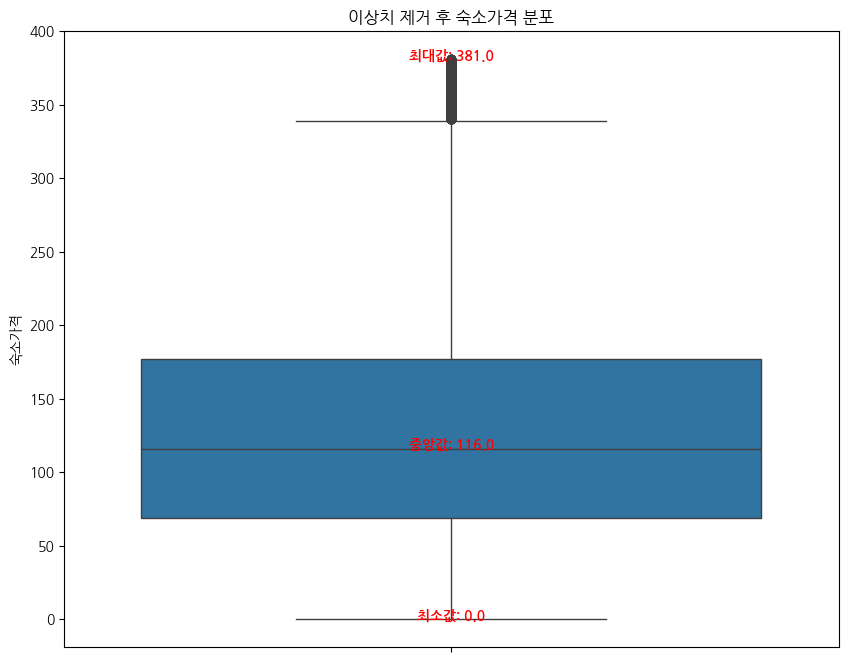

In [624]:
# 이상치 제거 후 숙소 가격에 대해서만 boxplot 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_clean, y='숙소_가격')
plt.title('이상치 제거 후 숙소가격 분포')
plt.ylabel('숙소가격')

# 최대값, 최소값, 중앙값 표시
max_price = df_clean['숙소_가격'].max()
min_price = df_clean['숙소_가격'].min()
median_price = df_clean['숙소_가격'].median()

plt.text(0, max_price, f'최대값: {max_price}', horizontalalignment='center', color='red', weight='semibold')
plt.text(0, min_price, f'최소값: {min_price}', horizontalalignment='center', color='red', weight='semibold')
plt.text(0, median_price, f'중앙값: {median_price}', horizontalalignment='center', color='red', weight='semibold')

plt.show()

숙소가격이 0인 값도 제거
- 이상치 제거한 데이터 변수 df_clean
- 원본 데이터 df

In [625]:
df_clean[df_clean['숙소_가격'] == 0.0]

,숙소_id,숙소_url,호스트_id,숙소_특징,슈퍼호스트,숙소_수,숙소_지역,위도,경도,숙소_유형,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
40878,49765360,https://www.airbnb.com/rooms/49765360,3010498,Private room in condo,f,61.0,Tower Hamlets,51.515915,-0.073669,Private room,...,2,0,4.5,5.0,5.0,4.5,5.0,5.0,5.0,0.3


In [626]:
df_clean = df_clean[df_clean['숙소_가격'] != 0.0]

In [627]:
df = df[df['숙소_가격'] != 0.0]

In [628]:
df_clean.shape

(40686, 28)

In [629]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40686 entries, 0 to 90735
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        40686 non-null  int64  
 1   숙소_url       40686 non-null  object 
 2   호스트_id       40686 non-null  int64  
 3   숙소_특징        40686 non-null  object 
 4   슈퍼호스트        40686 non-null  object 
 5   숙소_수         40686 non-null  float64
 6   숙소_지역        40686 non-null  object 
 7   위도           40686 non-null  float64
 8   경도           40686 non-null  float64
 9   숙소_유형        40686 non-null  object 
 10  수용인원수        40686 non-null  int64  
 11  욕실수          40666 non-null  float64
 12  침실수          40675 non-null  float64
 13  침대수          40611 non-null  float64
 14  어메니티         40686 non-null  object 
 15  숙소_가격        40686 non-null  float64
 16  최소_숙박일       40686 non-null  int64  
 17  최대_숙박일       40686 non-null  int64  
 18  리뷰수          40686 non-null  int64  
 19  30일_리뷰수  

숙소_특징 데이터확인

- 'Entire rental unit': '전체 대여 유닛',
- 'Private room in rental unit': '대여 유닛 내 개인 방',
- 'Entire townhouse': '전체 타운하우스',
-    'Entire home': '전체 집',
-    'Private room in home': '집 내 개인 방',
-    'Entire guesthouse': '전체 게스트하우스',
-    'Private room in townhouse': '타운하우스 내 개인 방',
-   'Entire condo': '전체 콘도',
-    'Private room in condo': '콘도 내 개인 방',
-    'Room in aparthotel': '아파트호텔 내 방',
-    'Entire serviced apartment': '전체 서비스 아파트',
-    'Private room in loft': '로프트 내 개인 방',
-    'Private room': '개인 방',
-    'Private room in bed and breakfast': 'B&B 내 개인 방',
-    'Entire guest suite': '전체 게스트 스위트',
-    'Private room in serviced apartment': '서비스 아파트 내 개인 방',
-    'Private room in bungalow': '방갈로 내 개인 방',
-    'Private room in guesthouse': '게스트하우스 내 개인 방',
-   'Entire loft': '전체 로프트',
-    'Entire cabin': '전체 오두막',
-    'Private room in guest suite': '게스트 스위트 내 개인 방',
-    'Entire cottage': '전체 코티지',
-    'Private room in villa': '빌라 내 개인 방',
-   'Private room in cottage': '코티지 내 개인 방',
-  'Tiny home': '작은 집',
-    'Entire place': '전체 장소',,
-    'Private room in casa particular': '카사 파르티쿨라 내 개인 방',
-    'Shepherd’s hut': '바퀴달린 오두막',
-    'Private room in vacation home': '휴가용 주택 내 개인 방',
-    'Room in boutique hotel': '부티크 호텔 내 방',
-    'Camper/RV': '캠퍼/RV',
-    'Entire vacation home': '전체 휴가용 주택',
-    'Entire bungalow': '전체 방갈로',
-    'Private room in hut': '오두막 내 개인 방',
-    'Entire villa': '전체 빌라',
-    'Floor': '층',
-    'Earthen home': '흙집',
-    'Private room in hostel': '호스텔 내 개인 방',
-    'Private room in floor': '층 내 개인 방',
-    'Private room in cabin': '오두막 내 개인 방',
-    'Private room in island': '섬 내 개인 방',
-    'Entire home/apt': '전체 집/아파트',
-    'Room in hotel': '호텔 내 방',
-    'Private room in tiny home': '작은 집 내 개인 방',
-    'Private room in farm stay': '농장 체류 내 개인 방',
-    'Campsite': '캠프장',
-    'Barn': '헛간',
-    'Religious building': '종교 건물',
-    'Private room in earthen home': '흙집 내 개인 방',
-    'Private room in treehouse': '트리하우스 내 개인 방',
-    'Hut': '오두막',
-    'Entire chalet': '전체 샬레',
-    'Tent': '텐트',
-    'Private room in religious building': '종교 건물 내 개인 방',
-   'Minsu': '민수',
-    'Casa particular': '개인 홈스테이',
-    'Island': '섬',
-    'Castle': '성',
-    'Tower': '탑',
-    "Private room in shepherd's hut": '오두막 내 개인 방',
-    'Shipping container': '선적 컨테이너',
-    'Treehouse': '트리하우스'

-    Houseboat': '하우스보트',
-    'Private room in houseboat': '하우스보트 내 개인 방'
-    'Private room in yurt': '요트 내 개인 방',
-    'Boat': '보트',
-    'Private room in boat': '보트 내 개인 방',

In [630]:
df_clean['숙소_특징'].unique()

array(['Entire rental unit', 'Private room in rental unit', 'Entire home',
       'Private room in home', 'Entire townhouse', 'Entire guesthouse',
       'Private room in townhouse', 'Private room in condo',
       'Entire condo', 'Room in aparthotel', 'Entire serviced apartment',
       'Private room in loft', 'Private room',
       'Private room in bed and breakfast', 'Entire guest suite',
       'Houseboat', 'Private room in serviced apartment',
       'Private room in guesthouse', 'Entire loft', 'Entire cabin',
       'Private room in bungalow', 'Private room in guest suite',
       'Entire cottage', 'Private room in villa',
       'Private room in cottage', 'Tiny home',
       'Private room in houseboat', 'Private room in casa particular',
       'Shepherd’s hut', 'Private room in vacation home', 'Entire place',
       'Room in boutique hotel', 'Camper/RV', 'Entire vacation home',
       'Boat', 'Entire bungalow', 'Earthen home',
       'Private room in hostel', 'Private room in c

In [631]:
# 'Houseboat': '하우스보트',
df_clean[df_clean['숙소_특징']== 'Houseboat'].count() # 15개 Entire home/apt

# 'Private room in houseboat': '하우스보트 내 개인 방'
df_clean[df_clean['숙소_특징']== 'Private room in houseboat'].count() # 5개 Private room

# 'Private room in yurt': '요트 내 개인 방',
df_clean[df_clean['숙소_특징']== 'Private room in yurt'] # 2개 Private room

# 'Boat': '보트',
df_clean[df_clean['숙소_특징']== 'Boat'].count() # 55개 Entire home/apt

# 'Private room in boat': '보트 내 개인 방',
df_clean[df_clean['숙소_특징']== 'Private room in boat'] # 9개 Private room


,숙소_id,숙소_url,호스트_id,숙소_특징,슈퍼호스트,숙소_수,숙소_지역,위도,경도,숙소_유형,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
33954,39029216,https://www.airbnb.com/rooms/39029216,51657387,Private room in boat,f,20.0,Westminster,51.518850,-0.180190,Private room,...,42,1,4.45,4.52,4.52,4.67,4.81,4.48,4.52,0.78
38230,44690713,https://www.airbnb.com/rooms/44690713,6334367,Private room in boat,t,6.0,Wandsworth,51.465610,-0.182560,Private room,...,23,0,4.91,4.91,4.96,4.96,4.96,4.83,4.78,0.53
74436,981208448316205003,https://www.airbnb.com/rooms/981208448316205003,1432477,Private room in boat,f,656.0,Tower Hamlets,51.501764,-0.015454,Private room,...,1,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.31
74440,981209451795254645,https://www.airbnb.com/rooms/981209451795254645,1432477,Private room in boat,f,656.0,Tower Hamlets,51.501550,-0.014430,Private room,...,2,0,3.00,3.00,3.00,3.00,3.00,3.00,3.00,0.38
74451,981209453861783108,https://www.airbnb.com/rooms/981209453861783108,1432477,Private room in boat,f,656.0,Tower Hamlets,51.501490,-0.015374,Private room,...,1,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.31


In [632]:
df_clean['숙소_특징'].value_counts()

숙소_특징
Entire rental unit                    15935
Private room in home                   5282
Entire condo                           5190
Private room in rental unit            4850
Entire home                            2954
Private room in condo                  2173
Entire serviced apartment              1087
Private room in townhouse               705
Entire townhouse                        429
Private room in bed and breakfast       288
Room in hotel                           208
Private room in guesthouse              180
Entire loft                             172
Room in boutique hotel                  144
Entire guesthouse                       143
Entire guest suite                      115
Private room in guest suite             114
Private room in loft                     72
Room in aparthotel                       69
Private room in serviced apartment       67
Private room in casa particular          65
Entire vacation home                     58
Boat                      

특정 숙소특징을 가지는 숙소가 11개 존재함
이런 숙소는 특수한 특징을 가진 숙소 (제거)

- 'Earthen home', 'Private room in hut', 'Private room in farm stay', 'Religious building', 'Hut', 'Tent', 'Island',
'Tower', 'Private room in shepherd's hut', 'Shipping container', 'Treehouse'


In [633]:
# 각 값의 개수 계산
value_counts = df['숙소_특징'].value_counts()

# 개수가 1인 값들만 필터링
unique_values = value_counts[value_counts == 1].index

# 원래 데이터프레임에서 개수가 1인 값들만 추출
filtered_df = df[df['숙소_특징'].isin(unique_values)]

filtered_df[['숙소_url','숙소_유형','숙소_특징','숙소_가격','침대수','침실수','욕실수']]

,숙소_url,숙소_유형,숙소_특징,숙소_가격,침대수,침실수,욕실수
10147,https://www.airbnb.com/rooms/12937630,Entire home/apt,Earthen home,129.0,1.0,1.0,1.0
18522,https://www.airbnb.com/rooms/20708040,Private room,Private room in hut,22.0,2.0,1.0,1.5
28132,https://www.airbnb.com/rooms/31192541,Private room,Private room in farm stay,98.0,1.0,1.0,1.0
28470,https://www.airbnb.com/rooms/31681169,Entire home/apt,Religious building,150.0,1.0,1.0,1.0
30099,https://www.airbnb.com/rooms/34203528,Entire home/apt,Hut,85.0,2.0,0.0,1.0
35958,https://www.airbnb.com/rooms/41195510,Private room,Private room in yurt,40.0,NaN,1.0,1.0
40062,https://www.airbnb.com/rooms/48583067,Entire home/apt,Tent,250.0,3.0,0.0,1.5
47874,https://www.airbnb.com/rooms/630686936062751321,Entire home/apt,Island,255.0,0.0,1.0,1.0
48586,https://www.airbnb.com/rooms/644897391871606650,Entire home/apt,Castle,414.0,2.0,2.0,1.0
50199,https://www.airbnb.com/rooms/672164115302913432,Entire home/apt,Tower,130.0,0.0,1.0,1.0


In [634]:
filtered_df['숙소_특징']

10147                      Earthen home
18522               Private room in hut
28132         Private room in farm stay
28470                Religious building
30099                               Hut
35958              Private room in yurt
40062                              Tent
47874                            Island
48586                            Castle
50199                             Tower
51775    Private room in shepherd's hut
60805                Shipping container
66758                         Treehouse
Name: 숙소_특징, dtype: object

In [635]:
# # 제거할 값들 리스트
# values_to_remove = ['Houseboat', 'Private room in houseboat', 'Private room in yurt', 'Boat', 'Private room in boat', \
#                     'Earthen home', 'Private room in hut', 'Private room in farm stay', 'Religious building', 'Hut', 'Tent', \
#                     'Island', 'Tower', 'Private room in shepherd\'s hut', 'Shipping container', 'Treehouse']

# # 필터링 조건
# condition = df_clean['숙소_특징'].isin(values_to_remove)

# # 행 제거
# df = df_clean[~condition]

# # 결과 출력
# df.shape

In [636]:
df_clean['숙소_가격'].describe(include='all')

count    40686.000000
mean       132.386349
std         78.910008
min          1.000000
25%         69.000000
50%        116.000000
75%        177.000000
max        381.000000
Name: 숙소_가격, dtype: float64

숙소가격과 침대수, 침실수, 욕실수의 연관성 비교

In [637]:
df_clean[['숙소_url','숙소_유형','숙소_특징','숙소_가격','침대수','침실수','욕실수']].describe()

,숙소_가격,침대수,침실수,욕실수
count,40686.000000,40611.000000,40675.000000,40666.000000
mean,132.386349,1.739972,1.407376,1.286714
std,78.910008,1.211962,0.827589,0.528537
min,1.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000
50%,116.000000,1.000000,1.000000,1.000000
75%,177.000000,2.000000,2.000000,1.500000
max,381.000000,14.000000,10.000000,12.000000


- 침실수가 제일 많은 것 10개
- 침실수가 제일 많은것 14개
- 욕실수가 제일 많은것 12개

In [638]:
df_clean['침실수'].value_counts()

침실수
1.0     25922
2.0      9128
3.0      2764
0.0      1754
4.0       856
5.0       185
6.0        45
7.0        15
8.0         4
9.0         1
10.0        1
Name: count, dtype: int64

In [639]:
df_clean['침대수'].value_counts()


침대수
1.0     20772
2.0     10249
3.0      4462
4.0      2069
0.0      1741
5.0       707
6.0       333
7.0       152
8.0        71
9.0        23
10.0       12
11.0        9
12.0        6
13.0        3
14.0        2
Name: count, dtype: int64

In [640]:
df_clean['욕실수'].value_counts()


욕실수
1.0     27518
2.0      5445
1.5      5301
2.5      1198
3.0       584
0.5       204
3.5       173
0.0       133
4.0        55
4.5        26
5.0        16
5.5         6
9.0         2
7.5         1
6.0         1
8.5         1
9.5         1
12.0        1
Name: count, dtype: int64

- 욕실수와 침실수가 비슷하면 방당 1개의 욕실이 있는 것(이해가능)

- 침실이 1개고 욕실수가 9,10개 인것 (이해불가능)-> 사이트들어가보자

- 15094 1방당 1욕실
- 44069 1방당 1욕실
- 54719 공용욕실 1개인데 9.5로 되어있음 (욕실수가 이상)
- 70804 침대수1개 침실수는 방문개수로 샌거같음 욕실도 1개 (침실수, 욕실수 이상)
- 74559 침대 2개 인데 0 개로 되어있음/ 욕실도 1개인데 12개 (침대수, 욕실수 이상)
- 87393	침실 침대 있고 욕실1개 인데 욕실사진이 9장있었음 (설마 해당 사진 개수로 샌거..?)

결론 : 중구난방으로 데이터값이 이상하다..
- 현재 데이터로는 침대수, 침실수, 욕실수는 숙소 가격과 연관지을수가 없다! 컬럼을 아예 제거 하고 가야할듯..


In [641]:
df_clean[df_clean['욕실수'] >= 7.5][['숙소_url','숙소_유형','숙소_특징','숙소_가격','침대수','침실수','욕실수']]


,숙소_url,숙소_유형,숙소_특징,숙소_가격,침대수,침실수,욕실수
15094,https://www.airbnb.com/rooms/17925370,Private room,Private room in home,300.0,2.0,7.0,7.5
44069,https://www.airbnb.com/rooms/53426653,Entire home/apt,Entire home,300.0,8.0,7.0,8.5
54719,https://www.airbnb.com/rooms/753710559669306384,Private room,Private room in home,74.0,1.0,1.0,9.5
70804,https://www.airbnb.com/rooms/949895788077592192,Private room,Private room in rental unit,75.0,1.0,6.0,9.0
74559,https://www.airbnb.com/rooms/983984337764617923,Private room,Private room in rental unit,76.0,0.0,1.0,12.0
87393,https://www.airbnb.com/rooms/1091109690799943661,Private room,Private room in rental unit,58.0,0.0,0.0,9.0


In [642]:
df_clean[(df_clean['숙소_유형'] == 'Entire home/apt')][['숙소_url','숙소_유형','숙소_특징','숙소_가격','침대수','침실수','욕실수']]

,숙소_url,숙소_유형,숙소_특징,숙소_가격,침대수,침실수,욕실수
0,https://www.airbnb.com/rooms/312761,Entire home/apt,Entire rental unit,160.0,1.0,1.0,1.0
2,https://www.airbnb.com/rooms/15400,Entire home/apt,Entire rental unit,120.0,1.0,1.0,1.0
4,https://www.airbnb.com/rooms/165336,Entire home/apt,Entire rental unit,100.0,1.0,1.0,1.0
10,https://www.airbnb.com/rooms/314164,Entire home/apt,Entire home,137.0,3.0,3.0,1.5
14,https://www.airbnb.com/rooms/34935,Entire home/apt,Entire rental unit,112.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
90359,https://www.airbnb.com/rooms/1110923850982941877,Entire home/apt,Entire rental unit,138.0,2.0,2.0,1.0
90369,https://www.airbnb.com/rooms/1111531590526041562,Entire home/apt,Entire rental unit,70.0,0.0,1.0,1.0
90438,https://www.airbnb.com/rooms/1112223577895036237,Entire home/apt,Entire rental unit,110.0,3.0,2.0,1.0
90590,https://www.airbnb.com/rooms/1113042462528003601,Entire home/apt,Entire rental unit,136.0,3.0,2.0,1.0


In [643]:
df_clean[df_clean['숙소_유형'] == 'Private room'][['숙소_url','숙소_유형','숙소_특징','숙소_가격','침대수','침실수','욕실수']]


,숙소_url,숙소_유형,숙소_특징,숙소_가격,침대수,침실수,욕실수
1,https://www.airbnb.com/rooms/13913,Private room,Private room in rental unit,65.0,1.0,1.0,1.0
3,https://www.airbnb.com/rooms/159736,Private room,Private room in rental unit,65.0,1.0,1.0,1.0
12,https://www.airbnb.com/rooms/33332,Private room,Private room in home,140.0,1.0,1.0,1.0
17,https://www.airbnb.com/rooms/174132,Private room,Private room in rental unit,60.0,1.0,1.0,1.5
21,https://www.airbnb.com/rooms/316137,Private room,Private room in home,90.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
90113,https://www.airbnb.com/rooms/1109418762387207742,Private room,Private room in villa,30.0,0.0,1.0,0.5
90434,https://www.airbnb.com/rooms/1111592077505861190,Private room,Private room in rental unit,35.0,1.0,1.0,1.0
90451,https://www.airbnb.com/rooms/1112236129628471308,Private room,Private room in rental unit,46.0,1.0,1.0,1.0
90568,https://www.airbnb.com/rooms/1112524736745357245,Private room,Private room in rental unit,78.0,2.0,1.0,2.0


In [644]:
df_clean[df_clean['숙소_유형'] == 'Private room']['숙소_가격'].mean()

68.54321418598157

In [645]:
df_clean[df_clean['숙소_유형'] == 'Entire home/apt+']['숙소_가격'].mean()


nan

원본데이터로 돌아가서 dat (숙소수, 슈퍼호스트,리뷰수=0, 리뷰점수6개분야 전부 nall 값 제거 한 데이터)

숙소 가격이 0인것 제외 / 숙소유형 entire home, private room 만 가져오기

In [653]:
dat = dat[dat['숙소_가격'] != 0.0]

In [654]:
dat[dat['숙소_가격'].isna()]['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    13765
Private room        8200
Name: count, dtype: int64

In [655]:
condition = (dat['숙소_유형'] == 'Hotel room') | (dat['숙소_유형'] == 'Shared room')
dat = dat[~condition]

In [648]:
dat.shape

(65147, 28)

숙소가격이 널값인 데이터에 숙소유형과 지역별 가격 평균대치

In [663]:
London_Price_Nan = dat[dat['숙소_가격'].isna()]

In [664]:
London_Price_Nan.shape

(21965, 28)

In [661]:
# 숙소 지역과 숙소 유형별 가격의 평균 계산
avg_price_by_area_type = df_clean.groupby(['숙소_지역', '숙소_유형'])['숙소_가격'].mean().reset_index()

In [662]:
avg_price_by_area_type

,숙소_지역,숙소_유형,숙소_가격
0,Barking and Dagenham,Entire home/apt,134.945122
1,Barking and Dagenham,Private room,48.993464
2,Barnet,Entire home/apt,137.334258
3,Barnet,Private room,59.675393
4,Bexley,Entire home/apt,129.452381
...,...,...,...
61,Waltham Forest,Private room,55.256131
62,Wandsworth,Entire home/apt,172.205087
63,Wandsworth,Private room,71.191074
64,Westminster,Entire home/apt,199.434795


In [665]:
# London_Price_Nan의 숙소 지역과 숙소 유형의 컬럼값이 avg_price_by_area_type의 숙소 지역과 숙소 유형과 같은 조건을 충족하는 경우
for index, row in London_Price_Nan.iterrows():
    condition = (avg_price_by_area_type['숙소_지역'] == row['숙소_지역']) & (avg_price_by_area_type['숙소_유형'] == row['숙소_유형'])
    # 조건을 충족하는 경우 London_Price_Nan의 숙소 가격 값에 avg_price_by_area_type의 조건에 맞는 숙소 가격 값을 대입
    if condition.any():
        avg_price = avg_price_by_area_type.loc[condition, '숙소_가격'].values[0]
        London_Price_Nan.at[index, '숙소_가격'] = avg_price

# 결과 확인
London_Price_Nan

,숙소_id,숙소_url,호스트_id,숙소_특징,슈퍼호스트,숙소_수,숙소_지역,위도,경도,숙소_유형,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
5,313710,https://www.airbnb.com/rooms/313710,1612623,Entire rental unit,f,1.0,Brent,51.533470,-0.232920,Entire home/apt,...,10,0,4.88,4.67,4.89,4.89,5.00,4.56,4.67,0.07
6,168359,https://www.airbnb.com/rooms/168359,648725,Entire rental unit,f,2.0,Southwark,51.491850,-0.088230,Entire home/apt,...,9,0,4.63,4.75,4.63,4.88,4.88,4.13,4.75,0.06
8,24328,https://www.airbnb.com/rooms/24328,41759,Entire townhouse,f,3.0,Wandsworth,51.470720,-0.162660,Entire home/apt,...,94,0,4.90,4.89,4.91,4.90,4.93,4.59,4.65,0.58
11,170702,https://www.airbnb.com/rooms/170702,814004,Private room in rental unit,f,1.0,Tower Hamlets,51.496860,-0.026270,Private room,...,135,0,4.95,4.97,4.98,4.94,4.98,4.79,4.93,0.88
13,314985,https://www.airbnb.com/rooms/314985,1617885,Private room in home,f,1.0,Newham,51.526260,0.029040,Private room,...,6,0,4.80,4.83,4.33,5.00,5.00,4.17,4.33,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87029,1089297954935898261,https://www.airbnb.com/rooms/1089297954935898261,124413326,Entire rental unit,f,1.0,Kingston upon Thames,51.403807,-0.274750,Entire home/apt,...,6,6,5.00,5.00,4.75,5.00,4.75,4.75,5.00,6.00
87276,1090640057985958105,https://www.airbnb.com/rooms/1090640057985958105,543091250,Entire rental unit,f,2.0,Kensington and Chelsea,51.486730,-0.177350,Entire home/apt,...,3,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,3.00
87290,1090452783507963913,https://www.airbnb.com/rooms/1090452783507963913,403509869,Private room in home,t,11.0,Barking and Dagenham,51.536394,0.084043,Private room,...,5,5,4.40,4.60,4.80,4.80,4.40,4.20,4.20,5.00
87300,1090481573621124067,https://www.airbnb.com/rooms/1090481573621124067,431163410,Private room in rental unit,f,22.0,Tower Hamlets,51.520802,-0.052637,Private room,...,1,1,5.00,5.00,5.00,4.00,5.00,4.00,5.00,1.00


In [666]:
London_Price_Nan.isna().sum()

숙소_id              0
숙소_url             0
호스트_id             0
숙소_특징              0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
위도                 0
경도                 0
숙소_유형              0
수용인원수              0
욕실수            21914
침실수             7707
침대수            21914
어메니티               0
숙소_가격              0
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        8
숙소_청결도_리뷰점수        2
숙소_체크인_리뷰점수       37
숙소_소통_리뷰점수        13
숙소_위치_리뷰점수        37
숙소_가격_리뷰점수        38
평균_리뷰수             0
dtype: int64

In [667]:
dat.loc[London_Price_Nan.index, '숙소_가격'] = London_Price_Nan['숙소_가격']


In [668]:
dat['숙소_가격'].isna().sum()

0

In [676]:
dat.shape

(65146, 28)

이상치 처리

In [670]:
temp = dat.copy()

In [672]:
Q1 = dat['숙소_가격'].quantile(0.25)
Q3 = dat['숙소_가격'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Lower Bound: -87.5, Upper Bound: 332.5
Q1: 70.0, Q3: 175.0, IQR: 105.0


이상치 확인

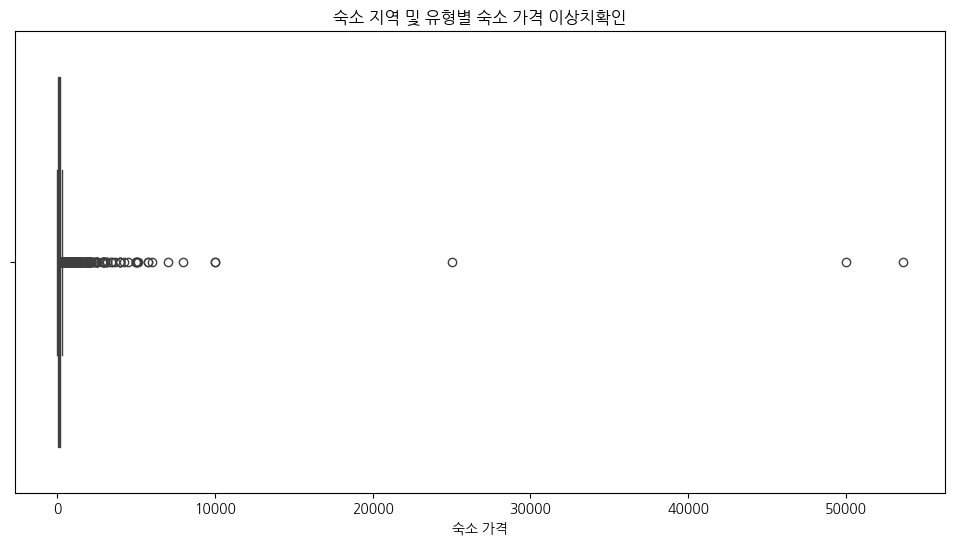

In [673]:
import seaborn as sns
import matplotlib.pyplot as plt



# 상자수염 그림(boxplot)으로 이상치 확인
plt.figure(figsize=(12, 6))
sns.boxplot(data=dat, x='숙소_가격')
plt.title('숙소 지역 및 유형별 숙소 가격 이상치확인')
plt.xlabel('숙소 가격')
plt.show()

이상치 제거 ( 3410개 발견)

In [677]:
outliers = (dat['숙소_가격'] >= lower_bound) & (dat['숙소_가격'] <= upper_bound)
outliers # 3410개

0        True
1        True
2        True
3        True
4        True
         ... 
90451    True
90568    True
90590    True
90648    True
90735    True
Name: 숙소_가격, Length: 65146, dtype: bool

In [679]:
# 이상치가 제거된 데이터
dat_clean = dat[outliers]

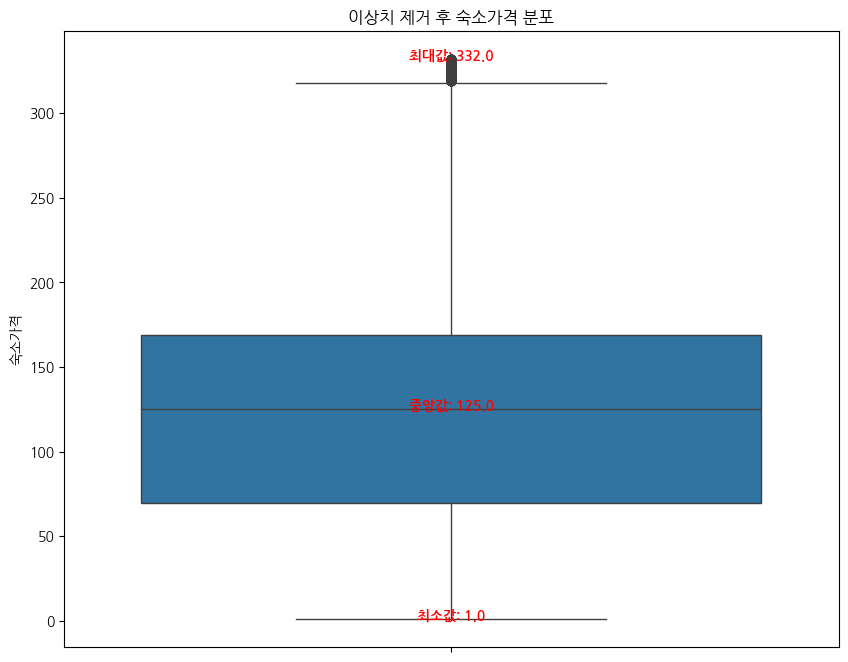

In [685]:
# 이상치 제거 후 숙소 가격에 대해서만 boxplot 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(data=dat_clean, y='숙소_가격')
plt.title('이상치 제거 후 숙소가격 분포')
plt.ylabel('숙소가격')

# 최대값, 최소값, 중앙값 표시
max_price = dat_clean['숙소_가격'].max()
min_price = dat_clean['숙소_가격'].min()
median_price = dat_clean['숙소_가격'].median()

plt.text(0, max_price, f'최대값: {max_price}', horizontalalignment='center', color='red', weight='semibold')
plt.text(0, min_price, f'최소값: {min_price}', horizontalalignment='center', color='red', weight='semibold')
plt.text(0, median_price, f'중앙값: {median_price}', horizontalalignment='center', color='red', weight='semibold')

plt.show()

In [686]:
dat_clean['숙소_가격'].value_counts()

숙소_가격
158.371128    1373
199.434795    1331
162.546550    1165
158.846094    1140
183.280605     992
              ... 
17.000000        1
1.000000         1
16.000000        1
9.000000         1
8.000000         1
Name: count, Length: 390, dtype: int64

In [690]:
dat_clean['숙소_가격'].describe()


count    61736.000000
mean       128.283719
std         64.939592
min          1.000000
25%         69.492102
50%        125.000000
75%        169.173813
max        332.000000
Name: 숙소_가격, dtype: float64

In [689]:
dat_clean[dat_clean['숙소_가격'] <  10.0]['숙소_가격']

35860    1.0
66713    9.0
87652    8.0
Name: 숙소_가격, dtype: float64